# Marriage Data

# day 385

## import the essentials 

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

## import and clean the data

In [3]:
# data urls

marriage_url = 'https://www.cdc.gov/nchs/data/dvs/state-marriage-rates-90-95-99-19.xlsx'
divorce_url  = 'https://www.cdc.gov/nchs/data/dvs/state-divorce-rates-90-95-99-19.xlsx'

In [4]:
data = pd.read_excel(marriage_url,header=5)
data

Unnamed: 0       2019       2018  \
0                                                 NaN        NaN        NaN   
1                                             Alabama   6.697687   6.760408   
2                                              Alaska   6.512245   6.683952   
3                                             Arizona   5.302995   5.534434   
4                                            Arkansas   8.377284   8.863156   
5                                        California 1   5.723191   6.035132   
6                                            Colorado   7.273297   7.585728   
7                                         Connecticut   5.048401   5.278133   
8                                            Delaware   4.951919   5.237957   
9                                District of Columbia   7.773302   7.835377   
10                                            Florida   7.070065   7.332063   
11                                            Georgia   6.038471   6.391479   
12                                             Hawaii  14.172891  15.263736   
13                                              Idaho   7.389770   7.810362   
14                                           Illinois   5.162794   5.478499   
15                                            Indiana   6.176270   6.554662   
16                                               Iowa   5.403684   5.737696   
17                                             Kansas   5.341683   5.366984   
18                                           Kentucky   6.265454   6.774234   
19                                          Louisiana   5.094870   5.118908   
20                                              Maine   7.053203   7.390145   
21                                           Maryland   5.592919   5.867393   
22                                      Massachusetts   5.019222   6.269931   
23                                           Michigan   5.183913   5.678220   
24                                          Minnesota   5.074090   5.304589   
25                                        Mississippi   6.018516   6.282877   
26                                           Missouri   5.969276   6.478791   
27                                            Montana   7.886577   7.713416   
28                                           Nebraska   5.498323   5.976878   
29                                             Nevada  25.894792  26.734186   
30                                      New Hampshire   6.637440   6.932762   
31                                         New Jersey   5.187009   5.367783   
32                                         New Mexico   5.981413   6.449279   
33                                           New York   7.217085   7.106515   
34                                     North Carolina   6.181491   6.433883   
35                                       North Dakota   5.423443   5.682319   
36                                               Ohio   5.329324   5.617035   
37                                           Oklahoma   6.336918   6.371924   
38                                             Oregon   5.991839   6.322075   
39                                       Pennsylvania   5.351512   5.545691   
40                                       Rhode Island   6.149934   6.297083   
41                                     South Carolina   6.288172   6.585398   
42                                       South Dakota   6.144741   6.535674   
43                                          Tennessee   7.488753   7.951096   
44                                              Texas   4.867898   6.121488   
45                                               Utah   8.058122   8.355306   
46                                            Vermont   7.726098   7.943490   
47                                           Virginia   6.128508   6.398452   
48                                         Washington   5.749260   6.023947   
49                                      West Virginia   5.978862   6.067010   
50            

In [5]:
# remove irrelevant rows
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
data

Unnamed: 0       2019       2018       2017       2016  \
1                Alabama   6.697687   6.760408   7.047340   7.147821   
2                 Alaska   6.512245   6.683952   6.914078   7.103441   
3                Arizona   5.302995   5.534434   5.834867   5.930541   
4               Arkansas   8.377284   8.863156   9.456845   9.860962   
5           California 1   5.723191   6.035132   6.278250   6.463590   
6               Colorado   7.273297   7.585728   7.333845   7.425443   
7            Connecticut   5.048401   5.278133   5.553784   5.617858   
8               Delaware   4.951919   5.237957   5.528417   5.613062   
9   District of Columbia   7.773302   7.835377   8.239526   8.149214   
10               Florida   7.070065   7.332063   7.806895   8.125967   
11               Georgia   6.038471   6.391479   6.870975   6.753976   
12                Hawaii  14.172891  15.263736  15.346702  15.555557   
13                 Idaho   7.389770   7.810362   7.796997   8.077759   
14              Illinois   5.162794   5.478499   5.982023   5.800000   
15               Indiana   6.176270   6.554662   6.854694   6.935419   
16                  Iowa   5.403684   5.737696   6.176028   6.149566   
17                Kansas   5.341683   5.366984   5.970225   6.210941   
18              Kentucky   6.265454   6.774234   7.174146   7.379354   
19             Louisiana   5.094870   5.118908   5.592472   6.106373   
20                 Maine   7.053203   7.390145   7.585857   7.640376   
21              Maryland   5.592919   5.867393   6.268158   6.308374   
22         Massachusetts   5.019222   6.269931   5.749423   5.777052   
23              Michigan   5.183913   5.678220   5.887088   5.935155   
24             Minnesota   5.074090   5.304589   5.611836   5.617984   
25           Mississippi   6.018516   6.282877   6.720619   7.013691   
26              Missouri   5.969276   6.478791   6.594551   6.851633   
27               Montana   7.886577   7.713416   7.963880   7.840617   
28              Nebraska   5.498323   5.976878   6.313813   6.465784   
29                Nevada  25.894792  26.734186  28.556333  28.392297   
30         New Hampshire   6.637440   6.932762   7.030857   6.977101   
31            New Jersey   5.187009   5.367783   5.450804   5.654780   
32            New Mexico   5.981413   6.449279   5.925568   6.366124   
33              New York   7.217085   7.106515   7.344656   7.451752   
34        North Carolina   6.181491   6.433883   6.846406   6.967624   
35          North Dakota   5.423443   5.682319   5.761240   5.955522   
36                  Ohio   5.329324   5.617035   5.821192   5.956154   
37              Oklahoma   6.336918   6.371924   6.815296   6.678882   
38                Oregon   5.991839   6.322075   6.660993   6.859226   
39          Pennsylvania   5.351512   5.545691   5.724399   5.778683   
40          Rhode Island   6.149934   6.297083   6.767399   6.710361   
41        South Carolina   6.288172   6.585398   7.034316   6.632979   
42          South Dakota   6.144741   6.535674   6.742819   7.247063   
43             Tennessee   7.488753   7.951096   8.234385   8.614092   
44                 Texas   4.867898   6.121488   7.096127   7.077625   
45                  Utah   8.058122   8.355306   8.720650   8.990183   
46               Vermont   7.726098   7.943490   7.908193   8.299792   
47              Virginia   6.128508   6.398452   6.783573   6.988628   
48            Washington   5.749260   6.023947   6.246909   6.235593   
49         West Virginia   5.978862   6.067010   6.311620   6.354097   
50             Wisconsin   5.037240   5.430056   5.634561   5.616134   
51               Wyoming   7.008098   7.051652   7.125657   7.079407   

         2015       2014       2013  2012  2011  ...  2006  2005  2004  2003  \
1    7.351544   7.806776   7.817785   8.2   8.4  ...   9.2   9.2   9.4   9.6   
2    7.407588   7.508836   7.293928   7.2   7.8  ...   8.2   8.2   8.5   8.1   
3    5.922469   5.780449   5.

In [6]:
# replace --- with nan
data = data.replace({'---': np.nan})
data

Unnamed: 0       2019       2018       2017       2016  \
1                Alabama   6.697687   6.760408   7.047340   7.147821   
2                 Alaska   6.512245   6.683952   6.914078   7.103441   
3                Arizona   5.302995   5.534434   5.834867   5.930541   
4               Arkansas   8.377284   8.863156   9.456845   9.860962   
5           California 1   5.723191   6.035132   6.278250   6.463590   
6               Colorado   7.273297   7.585728   7.333845   7.425443   
7            Connecticut   5.048401   5.278133   5.553784   5.617858   
8               Delaware   4.951919   5.237957   5.528417   5.613062   
9   District of Columbia   7.773302   7.835377   8.239526   8.149214   
10               Florida   7.070065   7.332063   7.806895   8.125967   
11               Georgia   6.038471   6.391479   6.870975   6.753976   
12                Hawaii  14.172891  15.263736  15.346702  15.555557   
13                 Idaho   7.389770   7.810362   7.796997   8.077759   
14              Illinois   5.162794   5.478499   5.982023   5.800000   
15               Indiana   6.176270   6.554662   6.854694   6.935419   
16                  Iowa   5.403684   5.737696   6.176028   6.149566   
17                Kansas   5.341683   5.366984   5.970225   6.210941   
18              Kentucky   6.265454   6.774234   7.174146   7.379354   
19             Louisiana   5.094870   5.118908   5.592472   6.106373   
20                 Maine   7.053203   7.390145   7.585857   7.640376   
21              Maryland   5.592919   5.867393   6.268158   6.308374   
22         Massachusetts   5.019222   6.269931   5.749423   5.777052   
23              Michigan   5.183913   5.678220   5.887088   5.935155   
24             Minnesota   5.074090   5.304589   5.611836   5.617984   
25           Mississippi   6.018516   6.282877   6.720619   7.013691   
26              Missouri   5.969276   6.478791   6.594551   6.851633   
27               Montana   7.886577   7.713416   7.963880   7.840617   
28              Nebraska   5.498323   5.976878   6.313813   6.465784   
29                Nevada  25.894792  26.734186  28.556333  28.392297   
30         New Hampshire   6.637440   6.932762   7.030857   6.977101   
31            New Jersey   5.187009   5.367783   5.450804   5.654780   
32            New Mexico   5.981413   6.449279   5.925568   6.366124   
33              New York   7.217085   7.106515   7.344656   7.451752   
34        North Carolina   6.181491   6.433883   6.846406   6.967624   
35          North Dakota   5.423443   5.682319   5.761240   5.955522   
36                  Ohio   5.329324   5.617035   5.821192   5.956154   
37              Oklahoma   6.336918   6.371924   6.815296   6.678882   
38                Oregon   5.991839   6.322075   6.660993   6.859226   
39          Pennsylvania   5.351512   5.545691   5.724399   5.778683   
40          Rhode Island   6.149934   6.297083   6.767399   6.710361   
41        South Carolina   6.288172   6.585398   7.034316   6.632979   
42          South Dakota   6.144741   6.535674   6.742819   7.247063   
43             Tennessee   7.488753   7.951096   8.234385   8.614092   
44                 Texas   4.867898   6.121488   7.096127   7.077625   
45                  Utah   8.058122   8.355306   8.720650   8.990183   
46               Vermont   7.726098   7.943490   7.908193   8.299792   
47              Virginia   6.128508   6.398452   6.783573   6.988628   
48            Washington   5.749260   6.023947   6.246909   6.235593   
49         West Virginia   5.978862   6.067010   6.311620   6.354097   
50             Wisconsin   5.037240   5.430056   5.634561   5.616134   
51               Wyoming   7.008098   7.051652   7.125657   7.079407   

         2015       2014       2013  2012  2011  ...  2006  2005  2004  2003  \
1    7.351544   7.806776   7.817785   8.2   8.4  ...   9.2   9.2   9.4   9.6   
2    7.407588   7.508836   7.293928   7.2   7.8  ...   8.2   8.2   8.5   8.1   
3    5.922469   5.780449   5.

In [7]:
# replace nan's with column median
data.fillna(data.median(axis=0,numeric_only=True), inplace=True)
data

Unnamed: 0       2019       2018       2017       2016  \
1                Alabama   6.697687   6.760408   7.047340   7.147821   
2                 Alaska   6.512245   6.683952   6.914078   7.103441   
3                Arizona   5.302995   5.534434   5.834867   5.930541   
4               Arkansas   8.377284   8.863156   9.456845   9.860962   
5           California 1   5.723191   6.035132   6.278250   6.463590   
6               Colorado   7.273297   7.585728   7.333845   7.425443   
7            Connecticut   5.048401   5.278133   5.553784   5.617858   
8               Delaware   4.951919   5.237957   5.528417   5.613062   
9   District of Columbia   7.773302   7.835377   8.239526   8.149214   
10               Florida   7.070065   7.332063   7.806895   8.125967   
11               Georgia   6.038471   6.391479   6.870975   6.753976   
12                Hawaii  14.172891  15.263736  15.346702  15.555557   
13                 Idaho   7.389770   7.810362   7.796997   8.077759   
14              Illinois   5.162794   5.478499   5.982023   5.800000   
15               Indiana   6.176270   6.554662   6.854694   6.935419   
16                  Iowa   5.403684   5.737696   6.176028   6.149566   
17                Kansas   5.341683   5.366984   5.970225   6.210941   
18              Kentucky   6.265454   6.774234   7.174146   7.379354   
19             Louisiana   5.094870   5.118908   5.592472   6.106373   
20                 Maine   7.053203   7.390145   7.585857   7.640376   
21              Maryland   5.592919   5.867393   6.268158   6.308374   
22         Massachusetts   5.019222   6.269931   5.749423   5.777052   
23              Michigan   5.183913   5.678220   5.887088   5.935155   
24             Minnesota   5.074090   5.304589   5.611836   5.617984   
25           Mississippi   6.018516   6.282877   6.720619   7.013691   
26              Missouri   5.969276   6.478791   6.594551   6.851633   
27               Montana   7.886577   7.713416   7.963880   7.840617   
28              Nebraska   5.498323   5.976878   6.313813   6.465784   
29                Nevada  25.894792  26.734186  28.556333  28.392297   
30         New Hampshire   6.637440   6.932762   7.030857   6.977101   
31            New Jersey   5.187009   5.367783   5.450804   5.654780   
32            New Mexico   5.981413   6.449279   5.925568   6.366124   
33              New York   7.217085   7.106515   7.344656   7.451752   
34        North Carolina   6.181491   6.433883   6.846406   6.967624   
35          North Dakota   5.423443   5.682319   5.761240   5.955522   
36                  Ohio   5.329324   5.617035   5.821192   5.956154   
37              Oklahoma   6.336918   6.371924   6.815296   6.678882   
38                Oregon   5.991839   6.322075   6.660993   6.859226   
39          Pennsylvania   5.351512   5.545691   5.724399   5.778683   
40          Rhode Island   6.149934   6.297083   6.767399   6.710361   
41        South Carolina   6.288172   6.585398   7.034316   6.632979   
42          South Dakota   6.144741   6.535674   6.742819   7.247063   
43             Tennessee   7.488753   7.951096   8.234385   8.614092   
44                 Texas   4.867898   6.121488   7.096127   7.077625   
45                  Utah   8.058122   8.355306   8.720650   8.990183   
46               Vermont   7.726098   7.943490   7.908193   8.299792   
47              Virginia   6.128508   6.398452   6.783573   6.988628   
48            Washington   5.749260   6.023947   6.246909   6.235593   
49         West Virginia   5.978862   6.067010   6.311620   6.354097   
50             Wisconsin   5.037240   5.430056   5.634561   5.616134   
51               Wyoming   7.008098   7.051652   7.125657   7.079407   

         2015       2014       2013  2012  2011  ...  2006  2005  2004  2003  \
1    7.351544   7.806776   7.817785   8.2   8.4  ...   9.2   9.2   9.4   9.6   
2    7.407588   7.508836   7.293928   7.2   7.8  ...   8.2   8.2   8.5   8.1   
3    5.922469   5.780449   5.

### exploration, ablation-analysis and freethrows

In [8]:
data.median()[:10]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12544\3063252800.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()[:10]


2019    6.038471
2018    6.391479
2017    6.767399
2016    6.851633
2015    6.856525
2014    6.892587
2013    6.769738
2012    6.800000
2011    6.800000
2010    6.800000
dtype: float64

In [9]:
data.median(axis=0,numeric_only=True)[:10]

2019    6.038471
2018    6.391479
2017    6.767399
2016    6.851633
2015    6.856525
2014    6.892587
2013    6.769738
2012    6.800000
2011    6.800000
2010    6.800000
dtype: float64

In [10]:
# converting pandas dataframe into numpy matrix(instructor's preference)

# extract to matrices
yearM = data.columns[1:].to_numpy().astype(float)
yearM

statesM = data.iloc[:,0]
statesM

M = data.iloc[:,1:].to_numpy()
np.round(M,2)

array([[ 6.7 ,  6.76,  7.05, ..., 10.8 ,  9.8 , 10.6 ],
       [ 6.51,  6.68,  6.91, ...,  8.6 ,  9.  , 10.2 ],
       [ 5.3 ,  5.53,  5.83, ...,  8.2 ,  8.8 , 10.  ],
       ...,
       [ 5.98,  6.07,  6.31, ...,  7.5 ,  6.1 ,  7.2 ],
       [ 5.04,  5.43,  5.63, ...,  6.7 ,  7.  ,  7.9 ],
       [ 7.01,  7.05,  7.13, ...,  9.9 , 10.6 , 10.7 ]])

### exploration, ablation-analysis and freethrows

In [11]:
yearM

array([2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1995., 1990.])

In [12]:
statesM

1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5             California 1
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
37                Oklahoma
3

In [13]:
M

array([[ 6.69768732,  6.76040755,  7.0473401 , ..., 10.8       ,
         9.8       , 10.6       ],
       [ 6.51224463,  6.68395174,  6.91407755, ...,  8.6       ,
         9.        , 10.2       ],
       [ 5.30299502,  5.5344338 ,  5.83486667, ...,  8.2       ,
         8.8       , 10.        ],
       ...,
       [ 5.97886223,  6.06700956,  6.31162035, ...,  7.5       ,
         6.1       ,  7.2       ],
       [ 5.03724044,  5.43005603,  5.63456057, ...,  6.7       ,
         7.        ,  7.9       ],
       [ 7.00809836,  7.05165153,  7.12565703, ...,  9.9       ,
        10.6       , 10.7       ]])

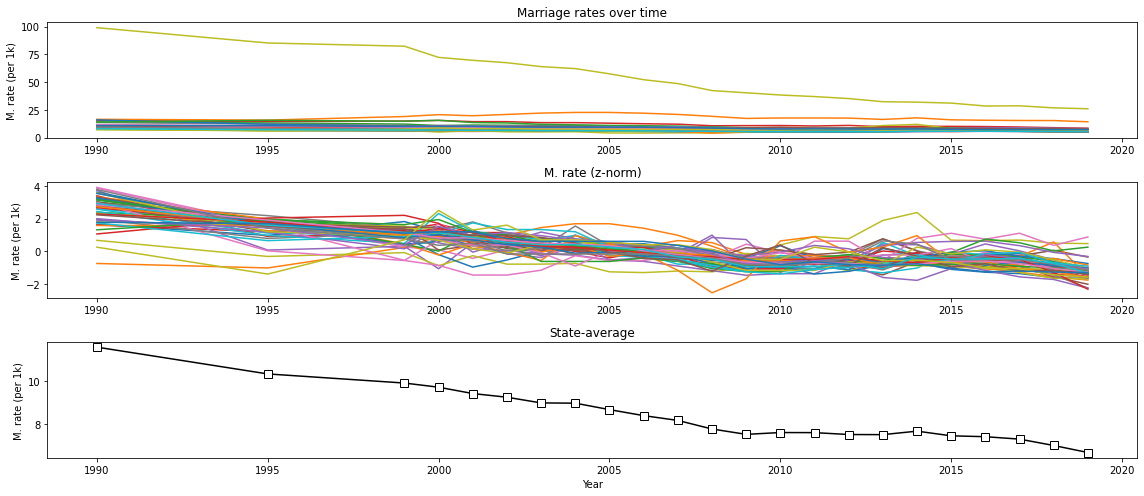

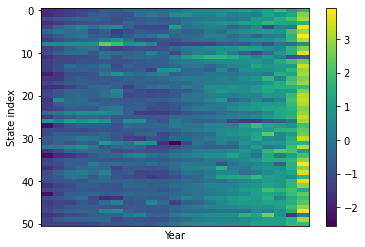

In [14]:
# make some plots

fig,ax = plt.subplots(3,1,figsize=(16,7))

ax[0].plot(yearM,M.T)
ax[0].set_ylabel('M. rate (per 1k)')
ax[0].set_title('Marriage rates over time')

ax[1].plot(yearM,stats.zscore(M.T))
ax[1].set_ylabel('M. rate (per 1k)')
ax[1].set_title('M. rate (z-norm)')

# notice that x-axis is non-constant
ax[2].plot(yearM,np.mean(M,axis=0),'ks-',markerfacecolor='w',markersize=8)
ax[2].set_ylabel('M. rate (per 1k)')
ax[2].set_title('State-average')
ax[2].set_xlabel('Year')
# QUESTION: Is this the same as the US average?

plt.tight_layout()
plt.show()

plt.imshow(stats.zscore(M,axis=1),aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.colorbar()
plt.show()

## conclusion:
* There was an outlier yellow line in the first plot so, in the 2nd plot we have z normalized all the states in the matrix to have values range between the same bounds and we observe that marriage rate declines across all states in general.
* Marriage rate seems to decline with Time.

## challenge: 

* is the average of all states equal to average of the overall US population?

In [15]:
# national average

np.mean(M)

8.379489870026447

In [16]:
# average of all states 
np.mean(np.mean(M,axis=0))

8.379489870026445

## conclusion:
* yes it is

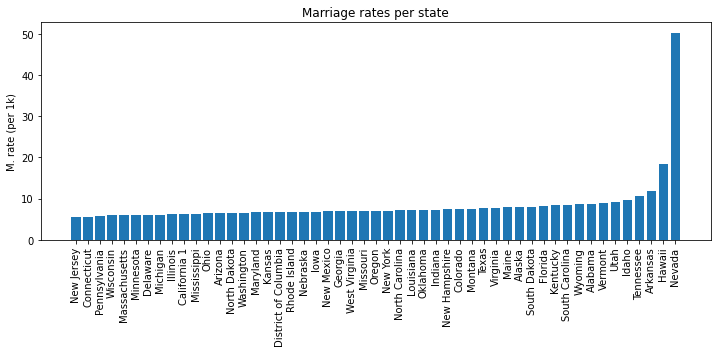

"no it is a real datapoint but an outlier. perhaps the heat in neveda makes people want to marry to fuck to produce \nmore children I don't know the prime causal agent that would explain the most variance in the cause-matrix."

In [17]:
# barplot of average marriage rate

# average over time
meanMarriageRate = np.mean(M,axis=1)

# sort index
sidx_M = np.argsort(meanMarriageRate)

fig = plt.figure(figsize=(12,4))
plt.bar(statesM.iloc[sidx_M],meanMarriageRate[sidx_M])
plt.xticks(rotation=90)
plt.ylabel('M. rate (per 1k)')
plt.title('Marriage rates per state')
plt.show()

# QUESTION:
#   Is Nevada a non-representative datapoint or an error? 
"""no it is a real datapoint but an outlier. perhaps the heat in neveda makes people want to marry to fuck to produce 
more children I don't know the prime causal agent that would explain the most variance in the cause-matrix."""


## exploration, ablation-analysis and freethrows

In [18]:
meanMarriageRate

array([ 8.66214617,  7.96626378,  6.52203674, 11.84615666,  6.26900344,
        7.5445386 ,  5.65130664,  6.00604285,  6.78393251,  8.32088568,
        6.99206978, 18.3119983 ,  9.74656206,  6.2116219 ,  7.32891628,
        6.84681698,  6.74838136,  8.42548302,  7.27189114,  7.94070218,
        6.66562802,  5.93560441,  6.10611667,  5.99048123,  6.35980892,
        7.06388375,  7.59233254,  6.83664216, 50.32289676,  7.50891741,
        5.63914628,  6.96652681,  7.09808813,  7.15180648,  6.52765902,
        6.45172763,  7.2795886 ,  7.08653654,  5.7460886 ,  6.82439382,
        8.45240286,  7.9766797 , 10.57164091,  7.71328474,  9.19659999,
        8.96327011,  7.75572571,  6.62789308,  7.03476565,  5.93216411,
        8.57892664])

In [19]:
sidx_M

array([30,  6, 38, 49, 21, 23,  7, 22, 13,  4, 24, 35,  2, 34, 47, 20, 16,
        8, 39, 27, 15, 31, 10, 48, 25, 37, 32, 33, 18, 36, 14, 29,  5, 26,
       43, 46, 19,  1, 41,  9, 17, 40, 50,  0, 45, 44, 12, 42,  3, 11, 28],
      dtype=int64)

In [20]:
meanMarriageRate[sidx_M] # sorted in ascending order

array([ 5.63914628,  5.65130664,  5.7460886 ,  5.93216411,  5.93560441,
        5.99048123,  6.00604285,  6.10611667,  6.2116219 ,  6.26900344,
        6.35980892,  6.45172763,  6.52203674,  6.52765902,  6.62789308,
        6.66562802,  6.74838136,  6.78393251,  6.82439382,  6.83664216,
        6.84681698,  6.96652681,  6.99206978,  7.03476565,  7.06388375,
        7.08653654,  7.09808813,  7.15180648,  7.27189114,  7.2795886 ,
        7.32891628,  7.50891741,  7.5445386 ,  7.59233254,  7.71328474,
        7.75572571,  7.94070218,  7.96626378,  7.9766797 ,  8.32088568,
        8.42548302,  8.45240286,  8.57892664,  8.66214617,  8.96327011,
        9.19659999,  9.74656206, 10.57164091, 11.84615666, 18.3119983 ,
       50.32289676])

In [21]:
# give the index to the iloc and get the corresponding data
statesM.iloc[sidx_M][:10]

31       New Jersey
7       Connecticut
39     Pennsylvania
50        Wisconsin
22    Massachusetts
24        Minnesota
8          Delaware
23         Michigan
14         Illinois
5      California 1
Name: Unnamed: 0, dtype: object

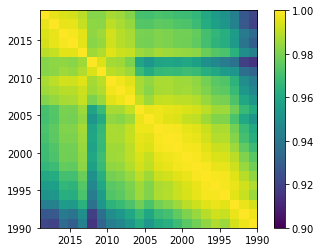

In [22]:
# show the correlation matrix

plt.imshow(np.corrcoef(M.T),vmin=.9,vmax=1,
             extent=[yearM[0],yearM[-1],yearM[-1],yearM[0]])
plt.colorbar()
plt.show()

In [23]:
# lets see my method to correlation matrix in seaborn with better visuals.

data.head()

Unnamed: 0      2019      2018      2017      2016       2015       2014  \
1       Alabama  6.697687  6.760408  7.047340  7.147821   7.351544   7.806776   
2        Alaska  6.512245  6.683952  6.914078  7.103441   7.407588   7.508836   
3       Arizona  5.302995  5.534434  5.834867  5.930541   5.922469   5.780449   
4      Arkansas  8.377284  8.863156  9.456845  9.860962  10.040279  10.112026   
5  California 1  5.723191  6.035132  6.278250  6.463590   6.184957   6.441492   

       2013  2012  2011  ...  2006  2005  2004  2003  2002  2001  2000  1999  \
1  7.817785   8.2   8.4  ...   9.2   9.2   9.4   9.6   9.9   9.4  10.1  10.8   
2  7.293928   7.2   7.8  ...   8.2   8.2   8.5   8.1   8.3   8.1   8.9   8.6   
3  5.401091   5.6   5.7  ...   6.5   6.6   6.7   6.5   6.7   7.6   7.5   8.2   
4  9.751052  10.9  10.4  ...  12.4  12.9  13.4  13.4  14.3  14.3  15.4  14.8   
5  6.460467   6.0   5.8  ...   6.3   6.4   6.4   6.1   6.2   6.5   5.8   6.4   

   1995  1990  
1   9.8  10.6  
2   9.0  10.2  
3   8.8  10.0  
4  14.4  15.3  
5   6.3   7.9  

[5 rows x 24 columns]

In [24]:
data.columns

Index(['Unnamed: 0',         2019,         2018,         2017,         2016,
               2015,         2014,         2013,         2012,         2011,
               2010,         2009,         2008,         2007,         2006,
               2005,         2004,         2003,         2002,         2001,
               2000,         1999,         1995,         1990],
      dtype='object')

In [25]:
data = data.rename(columns={'Unnamed: 0':'states'})
data

states       2019       2018       2017       2016  \
1                Alabama   6.697687   6.760408   7.047340   7.147821   
2                 Alaska   6.512245   6.683952   6.914078   7.103441   
3                Arizona   5.302995   5.534434   5.834867   5.930541   
4               Arkansas   8.377284   8.863156   9.456845   9.860962   
5           California 1   5.723191   6.035132   6.278250   6.463590   
6               Colorado   7.273297   7.585728   7.333845   7.425443   
7            Connecticut   5.048401   5.278133   5.553784   5.617858   
8               Delaware   4.951919   5.237957   5.528417   5.613062   
9   District of Columbia   7.773302   7.835377   8.239526   8.149214   
10               Florida   7.070065   7.332063   7.806895   8.125967   
11               Georgia   6.038471   6.391479   6.870975   6.753976   
12                Hawaii  14.172891  15.263736  15.346702  15.555557   
13                 Idaho   7.389770   7.810362   7.796997   8.077759   
14              Illinois   5.162794   5.478499   5.982023   5.800000   
15               Indiana   6.176270   6.554662   6.854694   6.935419   
16                  Iowa   5.403684   5.737696   6.176028   6.149566   
17                Kansas   5.341683   5.366984   5.970225   6.210941   
18              Kentucky   6.265454   6.774234   7.174146   7.379354   
19             Louisiana   5.094870   5.118908   5.592472   6.106373   
20                 Maine   7.053203   7.390145   7.585857   7.640376   
21              Maryland   5.592919   5.867393   6.268158   6.308374   
22         Massachusetts   5.019222   6.269931   5.749423   5.777052   
23              Michigan   5.183913   5.678220   5.887088   5.935155   
24             Minnesota   5.074090   5.304589   5.611836   5.617984   
25           Mississippi   6.018516   6.282877   6.720619   7.013691   
26              Missouri   5.969276   6.478791   6.594551   6.851633   
27               Montana   7.886577   7.713416   7.963880   7.840617   
28              Nebraska   5.498323   5.976878   6.313813   6.465784   
29                Nevada  25.894792  26.734186  28.556333  28.392297   
30         New Hampshire   6.637440   6.932762   7.030857   6.977101   
31            New Jersey   5.187009   5.367783   5.450804   5.654780   
32            New Mexico   5.981413   6.449279   5.925568   6.366124   
33              New York   7.217085   7.106515   7.344656   7.451752   
34        North Carolina   6.181491   6.433883   6.846406   6.967624   
35          North Dakota   5.423443   5.682319   5.761240   5.955522   
36                  Ohio   5.329324   5.617035   5.821192   5.956154   
37              Oklahoma   6.336918   6.371924   6.815296   6.678882   
38                Oregon   5.991839   6.322075   6.660993   6.859226   
39          Pennsylvania   5.351512   5.545691   5.724399   5.778683   
40          Rhode Island   6.149934   6.297083   6.767399   6.710361   
41        South Carolina   6.288172   6.585398   7.034316   6.632979   
42          South Dakota   6.144741   6.535674   6.742819   7.247063   
43             Tennessee   7.488753   7.951096   8.234385   8.614092   
44                 Texas   4.867898   6.121488   7.096127   7.077625   
45                  Utah   8.058122   8.355306   8.720650   8.990183   
46               Vermont   7.726098   7.943490   7.908193   8.299792   
47              Virginia   6.128508   6.398452   6.783573   6.988628   
48            Washington   5.749260   6.023947   6.246909   6.235593   
49         West Virginia   5.978862   6.067010   6.311620   6.354097   
50             Wisconsin   5.037240   5.430056   5.634561   5.616134   
51               Wyoming   7.008098   7.051652   7.125657   7.079407   

         2015       2014       2013  2012  2011  ...  2006  2005  2004  2003  \
1    7.351544   7.806776   7.817785   8.2   8.4  ...   9.2   9.2   9.4   9.6   
2    7.407588   7.508836   7.293928   7.2   7.8  ...   8.2   8.2   8.5   8.1   
3    5.922469   5.780449   5.4010

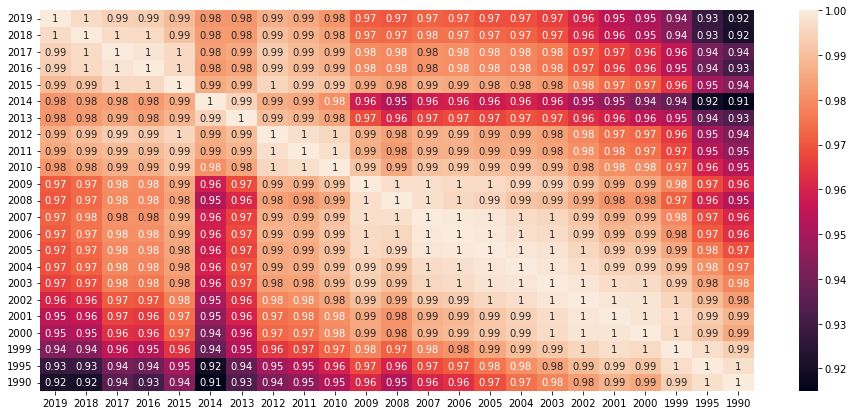

In [26]:

plt.figure(figsize=(16,7))
corr_matrix = data.corr()

sns.heatmap(corr_matrix,annot=True)

plt.show()

## conclusion:
* marriage rate between years seem to highly highly correlated!!!

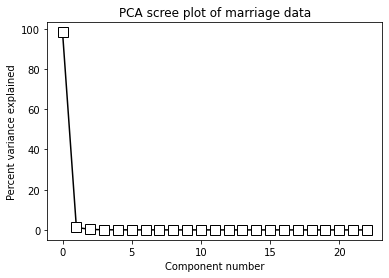

array([9.82644853e+01, 1.24490055e+00, 2.49245218e-01, 7.49731265e-02,
       4.35304225e-02, 2.51909291e-02, 2.12681736e-02, 1.91562974e-02,
       1.10117312e-02, 7.95298422e-03, 7.04976997e-03, 6.94643370e-03,
       6.04481631e-03, 4.38914561e-03, 2.92379416e-03, 2.73281029e-03,
       2.06630186e-03, 1.75529040e-03, 1.33063465e-03, 1.05079032e-03,
       9.15216526e-04, 7.86044827e-04, 2.94251694e-04])

In [27]:
# PCA

# lets find the number of principal components that explain the most variance in the M matrix.
pca = PCA().fit(M)

# scree plot
plt.plot(100*pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of marriage data')
plt.show()
100*pca.explained_variance_ratio_

* 98.26% of variance is explained by a single component. The other components contribution is almost negligible.
* That means every other components or features or years in our case are just alike.
* Essentially, pca.explained_variance_ratio_ quantifies how much of the total variance is captured by each principal component.
* Each value in explained_variance_ratio_ corresponds to a principal component and represents the ratio of the variance explained by that principal component to the total variance in the dataset.
* By looking at these ratios, you can determine how many principal components you need to retain to capture a significant amount of the total variance in the dataset. This is crucial for dimensionality reduction, where you want to reduce the number of features while retaining most of the important information.

## exploration, ablation-analysis and freethrows

In [28]:
pca.explained_variance_ratio_*100

array([9.82644853e+01, 1.24490055e+00, 2.49245218e-01, 7.49731265e-02,
       4.35304225e-02, 2.51909291e-02, 2.12681736e-02, 1.91562974e-02,
       1.10117312e-02, 7.95298422e-03, 7.04976997e-03, 6.94643370e-03,
       6.04481631e-03, 4.38914561e-03, 2.92379416e-03, 2.73281029e-03,
       2.06630186e-03, 1.75529040e-03, 1.33063465e-03, 1.05079032e-03,
       9.15216526e-04, 7.86044827e-04, 2.94251694e-04])

# Repeat for divorce data

In [29]:
# import the data
data = pd.read_excel(divorce_url,header=5)
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
data = data.replace({'---': np.nan})
data.fillna(data.median(axis=0,numeric_only=True), inplace=True)
yearD = data.columns[1:].to_numpy().astype(float)
statesD = data.iloc[:,0]
D = data.iloc[:,1:].to_numpy()

In [30]:
data.columns

Index(['Unnamed: 0',         2019,         2018,         2017,         2016,
               2015,         2014,         2013,         2012,         2011,
               2010,         2009,         2008,         2007,         2006,
               2005,         2004,         2003,         2002,         2001,
               2000,         1999,         1995,         1990],
      dtype='object')

In [31]:
divorce_df = data.rename(columns={'Unnamed: 0':'states'})
divorce_df.head(5)

states      2019      2018      2017      2016      2015      2014  \
1     Alabama  3.572984  3.714296  3.660498  3.778710  3.853690  3.785022   
2      Alaska  3.638874  3.734551  3.580722  3.946655  4.138499  3.951233   
3     Arizona  2.915899  2.954273  3.479199  3.352007  3.578466  3.892010   
4    Arkansas  4.017159  4.066925  3.719694  3.926381  4.842516  4.845318   
5  California  2.867509  2.951789  3.030063  3.168503  3.177654  3.324706   

       2013  2012  2011  ...  2006  2005  2004  2003  2002  2001  2000  1999  \
1  3.683290   3.6   4.3  ...   4.9   4.9  4.90   5.2   5.4   5.4   5.5   5.7   
2  4.461784   4.5   4.8  ...   4.2   4.3  4.30   3.9   4.6   4.3   3.9   5.0   
3  3.929150   4.3   3.9  ...   4.0   4.2  4.30   4.4   4.8   4.0   4.6   4.6   
4  5.011872   5.3   5.3  ...   5.8   6.0  6.10   6.0   6.2   6.2   6.4   6.2   
5  3.405376   3.5   3.7  ...   3.9   3.9  3.85   3.9   4.0   4.0   4.1   4.4   

   1995  1990  
1   6.0   6.1  
2   5.0   5.5  
3   6.2   6.9  
4   6.3   6.9  
5   4.6   4.3  

[5 rows x 24 columns]

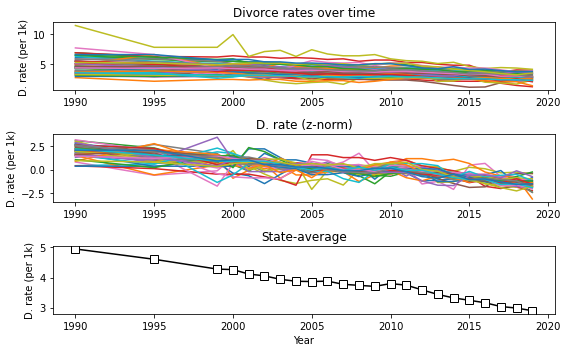

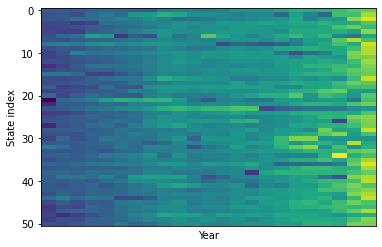

In [32]:
# make some plots
fig,ax = plt.subplots(3,1,figsize=(8,5))

ax[0].plot(yearD,D.T)
ax[0].set_ylabel('D. rate (per 1k)')
ax[0].set_title('Divorce rates over time')

ax[1].plot(yearD,stats.zscore(D.T))
ax[1].set_ylabel('D. rate (per 1k)')
ax[1].set_title('D. rate (z-norm)')

# notice that x-axis is non-constant
ax[2].plot(yearD,np.mean(D,axis=0),'ks-',markerfacecolor='w',markersize=8)
ax[2].set_ylabel('D. rate (per 1k)')
ax[2].set_title('State-average')
ax[2].set_xlabel('Year')
plt.tight_layout()
plt.show()

plt.imshow(stats.zscore(D,axis=1),aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.show()




* I can't believe my eyes. Is divorce rate truly decreasing?

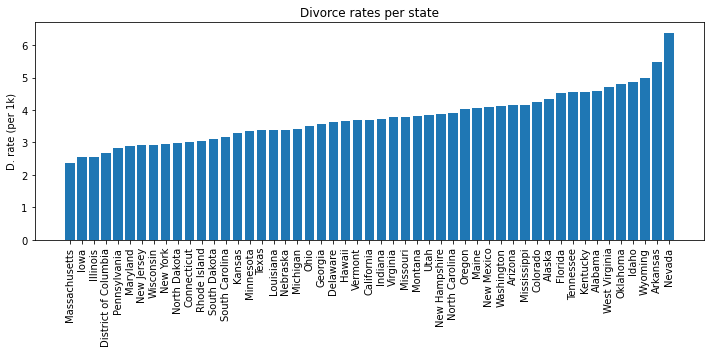

In [33]:
# barplot of average divorce rate
meanDivorceRate = np.mean(D,axis=1)
sidx_D = np.argsort(meanDivorceRate)

fig = plt.figure(figsize=(12,4))
plt.bar(statesD.iloc[sidx_D],meanDivorceRate[sidx_D])
plt.xticks(rotation=90)
plt.ylabel('D. rate (per 1k)')
plt.title('Divorce rates per state')
plt.show()

* neveda has the highest marriage rate and highest divorce rate.
* massuchussets has the lowest divorce rate.
* wyoming surprisingly has medium marriage rate and a lot of divorces so is the case with Arkansas.

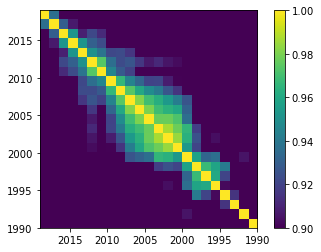

In [34]:
# show the correlation matrix
plt.imshow(np.corrcoef(D.T),vmin=.9,vmax=1,
             extent=[yearD[0],yearD[-1],yearD[-1],yearD[0]])
plt.colorbar()
plt.show()


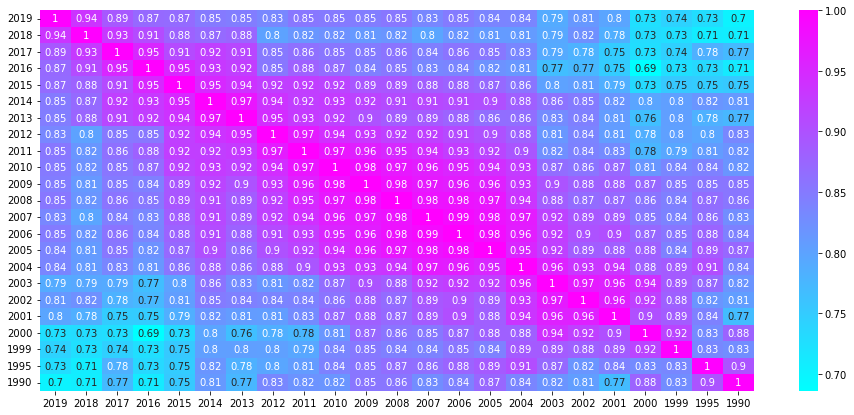

In [35]:
# correlation matrix in sns
plt.figure(figsize=(16,7))
sns.heatmap(divorce_df.corr(),annot=True,cmap='cool')
plt.show()

* This correlation matrix says: 2019 is more like 2018,2017 than 1990 or 1995

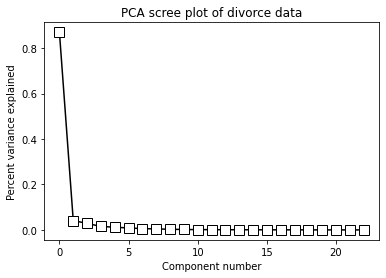

In [36]:
# PCA

# find the number of components that explain the maximum variance of the data
pca = PCA().fit(D)

# scree plot
plt.plot(pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of divorce data')
plt.show()

In [37]:
pca.explained_variance_ratio_

array([8.69616459e-01, 4.13817457e-02, 2.88245980e-02, 1.54053334e-02,
       1.22255638e-02, 8.72056043e-03, 5.90127852e-03, 4.60886427e-03,
       3.02651277e-03, 2.07962627e-03, 1.46256456e-03, 1.36626396e-03,
       1.01958145e-03, 9.32557613e-04, 7.22071865e-04, 6.08182908e-04,
       4.77813063e-04, 4.19113204e-04, 3.46741703e-04, 2.64743754e-04,
       2.18126740e-04, 1.97333487e-04, 1.74363702e-04])

* 87% of variance is explained by one single component.
* That means every other components or features or years in our case are just alike.

In [38]:
# check if marriage and divorce datasets have the same year/state order

# should be zero
print( 'Comparison of year vectors: ')
print( np.sum(yearD-yearM) )
# should be TRUE


Comparison of year vectors: 
0.0


In [39]:
print('')
print( 'Comparison of states vectors: ')
print( statesM.equals(statesD) )
# ... uh oh...




Comparison of states vectors: 
False


In [40]:
# compare
tmpStateNames = pd.concat([statesM,statesD],axis=1)
print(tmpStateNames)



              Unnamed: 0            Unnamed: 0
1                Alabama               Alabama
2                 Alaska                Alaska
3                Arizona               Arizona
4               Arkansas              Arkansas
5           California 1            California
6               Colorado              Colorado
7            Connecticut           Connecticut
8               Delaware              Delaware
9   District of Columbia  District of Columbia
10               Florida               Florida
11               Georgia               Georgia
12                Hawaii                Hawaii
13                 Idaho                 Idaho
14              Illinois              Illinois
15               Indiana               Indiana
16                  Iowa                  Iowa
17                Kansas                Kansas
18              Kentucky              Kentucky
19             Louisiana             Louisiana
20                 Maine                 Maine
21           

In [41]:
# find the difference(california i beleive)
np.where(tmpStateNames.iloc[:,0] != tmpStateNames.iloc[:,1])

(array([4], dtype=int64),)

yes it is


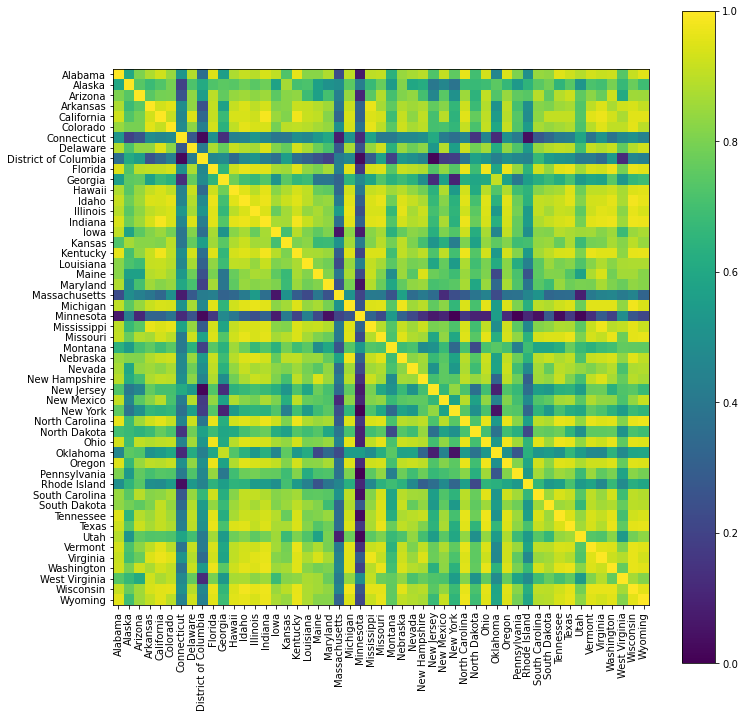

In [42]:
# btw, you can also correlate over states

fig = plt.figure(figsize=(12,12))
plt.imshow(np.corrcoef(D),vmin=0,vmax=1)
plt.xticks(ticks=range(len(statesD)),labels=statesD,rotation=90)
plt.yticks(ticks=range(len(statesD)),labels=statesD)
plt.colorbar()
plt.show()

* some states are weakly correlated with other states and others are strongly correlated with others.
* perhaps these regions with high correlation with others are geographically close to each other, perhaps they may have similar culture, socio economic background, and so on..

# inferential statistics

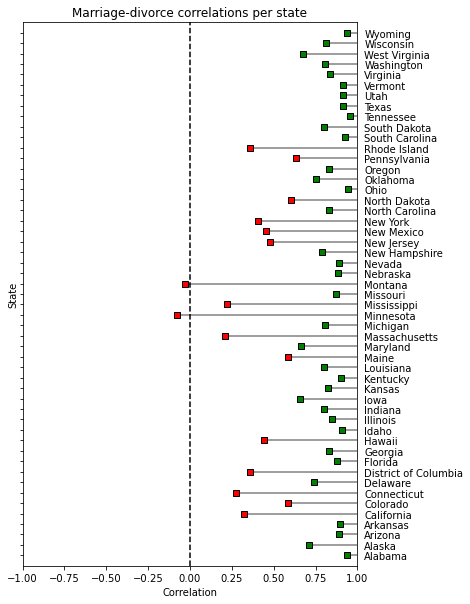

In [50]:
# Correlate M and D over time per state


# Bonferroni corrected threshold
pvalThresh = .05/51


fig = plt.figure(figsize=(6,10))

color = 'rg'
for si in range(len(statesM)):
    
    # compute correlation and p-value
    r,p = stats.pearsonr(M[si,:],D[si,:])
    
    # plot the data point
    plt.plot([r,1],[si,si],'-',color=[.5,.5,.5])
    plt.plot(r,si,'ks',markerfacecolor=color[bool(p<pvalThresh)])

plt.ylabel('State')
plt.xlabel('Correlation')
plt.title('Marriage-divorce correlations per state')
plt.yticks(range(len(statesM)),labels=statesD)
plt.tick_params(axis='y',which='both',labelleft=False,labelright=True)
plt.xlim([-1,1])
plt.ylim([-1,len(statesM)])
plt.plot([0,0],[-1,len(statesM)],'k--')
plt.show()

## exploration, ablation-analysis and freethrows

![sfs](https://www.investopedia.com/thmb/LrltmudqkVx0I1Vrz8GFCSbdeEI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/bonferroni-test.asp-final-7570705690b5465cbc4042dbefd422d3.png)
![ssfs](https://toptipbio.com/wp-content/uploads/2019/02/Bonferroni-correction-method-equation.jpg)

In [51]:
# bonferroni correction
0.05/len(statesM)

0.000980392156862745

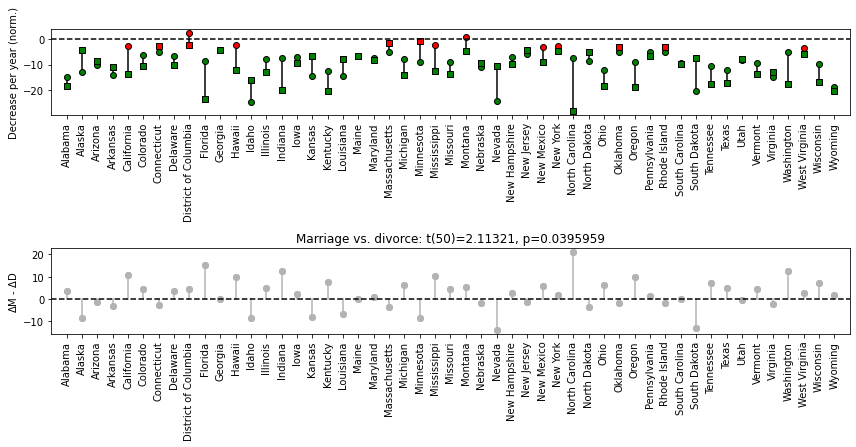

In [53]:
# have marriage/divorce rates really declined over time?

fig,ax = plt.subplots(2,1,figsize=(12,6))


# initialize slope differences vector
MvsD = np.zeros(len(statesM))

for rowi in range(len(statesM)):
    
    # run linear regression (includes the intercept!) for each state.
    # slope, intercept,correlation coefficient, p-value,standard error
    bM,intercept,r,pM,seM = stats.linregress(yearM,M[rowi,:])
    bD,intercept,r,pD,seD = stats.linregress(yearM,D[rowi,:])
    
    # normalize beta coefficients(slopes or weights)
    bM = bM / seM
    bD = bD / seD
    
    # plot the slope values
    ax[0].plot([rowi,rowi],[bM,bD],'k')
    ax[0].plot(rowi,bM,'ko',markerfacecolor=color[bool(pM<pvalThresh)])
    ax[0].plot(rowi,bD,'ks',markerfacecolor=color[bool(pD<pvalThresh)])
    
    # plot the slope differences
    ax[1].plot([rowi,rowi],[bM-bD, 0],'-',color=[.7,.7,.7])
    ax[1].plot([rowi,rowi],[bM-bD,bM-bD],'o',color=[.7,.7,.7])
    
    # store the slope differences for subsequent t-test
    MvsD[rowi] = bM-bD



# make the plot look nicer
for i in range(2):
    ax[i].set_xticks(range(51))
    ax[i].set_xticklabels(statesD,rotation=90)
    ax[i].set_xlim([-1,51])
    ax[i].plot([-1,52],[0,0],'k--')

ax[0].set_ylabel('Decrease per year (norm.)')
ax[1].set_ylabel('$\Delta$M - $\Delta$D')



### ttest on whether the M-vs-D rates are really different
t,p = stats.ttest_1samp(MvsD,0)
df = len(MvsD)-1

# set the title
ax[1].set_title('Marriage vs. divorce: t(%g)=%g, p=%g'%(df,t,p))

plt.tight_layout()
plt.show()

* marriages and divorces are decreasing overtime for most of the states statiscally significantly.
